___
<img style="float: right; margin: 0px 0px 15px 15px;" src="https://docs.aws.amazon.com/images/machine-learning/latest/dg/images/mlconcepts_image5.png" width="450px" height="280px" />


# <font color= #8A0829> Laboratorio de Modelado de Datos </font>
#### <font color= #2E9AFE> `Martes y Viernes (Videoconferencia) de 13:00 - 15:00 hrs`</font>
- <Strong> Sara Eugenia Rodríguez </Strong>
- <Strong> Año </Strong>: 2025
- <Strong> Email: </Strong>  <font color="blue"> `cd682324@iteso.mx` </font>
___


## <font color= #2E9AFE> Tema: Overfitting y Underfitting</font>

| Término    | Significado | Síntomas |
| -------- | ------- | ------- |
| Underfitting  |Modelo es demasiado simple para aprender patrones.    | Bajo performance tanto en entrenamiento y prueba    |
| Overfitting | El modelo es demasiado complejo, se memoriza los datos de entrenamiento     |  Exactitud en el entrenamiento alto, Exactitud en la prueba mucho más baja    |
| Balanceado    | El modelo captura los patrones y se generaliza bien    | Exactitud alta en entrenamiento y prueba, la curva de aprendizaje converge    |


#### <font color= #2E9AFE> Underfitting</font>

**Cómo se puede corregir?**
- Agregar más variables: crear nuevas variables o combinar algunas existentes para que el modelo capture más patrones
- Quitar variables redundantes
- Reducir la regularización
- Usar un modelo más complejo
- Probar con variables polinómicas (si es posible)


#### <font color= #2E9AFE> Overfitting</font>

**Cómo se puede corregir?**
- Agregar más datos que den más variedad de ejemplos (no siempre es posible)
- Reducir la complejidad del modelo (ej. elegir un modelo más sencillo o elegir hiperparámetros menos complejos)
- Agregar regularización (L1/L2)
- Usar cross-validation para tunear hiperparámetros
- Usar el "early stopping" para modelos iterativos (ej. redes neuronales)


#### <font color= #2E9AFE> Ajuste balanceado</font>

**Cómo lo obtenemos?**
- Pre-procesamiento adecuado (limpieza, escalamiento, imputacion, etc)
- Buena elección del modelo
- Buen ajuste de hiperparámetros
- Cross validation

#### <font color= #2E9AFE> Cómo lo detectamos?</font>
- Calcular métricas de performance tanto en el train como en el test
- Curvas de aprendizaje
- Performance en el cross validation


### <font color= #2E9AFE> Bias and Variance Trade Off</font>

Una de las grandes tensiones que existe al crear un modelo de machine learning es que queremos **construir un modelo que sea lo suficientemente expresivo como para capturar los patrones en los datos, pero no tan flexible como para confundir ruido con señal.**

Para cuantificar el rendimiento del modelo, a menudo analizamos el error cuadrático esperado entre la predicción del modelo y la verdadera función que pretendemos aproximar. Este error esperado se puede dividir en tres componentes:

$$Total Error = Bias^{2} + Variance + Irreducible Error$$

**Bias (o sesgo):** error que ocurre al aproximar un problema complejo del mundo real con un modelo simplificado. Un sesgo alto indica que el modelo pasa por alto relaciones esenciales en los datos, lo que lleva a un underfitting.

**Variance:** Mide qué tan sensible es el modelo a pequeños cambios en los datos de entrenamiento (específicamente, entrada). Un modelo con alta varianza no solo captura el patrón sino también el ruido específico de ese conjunto de datos, lo que genera un rendimiento deficiente con datos nuevos; este fenómeno se conoce como sobreajuste.

**Irreducible error:** El error irreducible surge del ruido inherente al proceso y no puede ser eliminado por ningún modelo. Puede deberse a errores de sensores, inconsistencias en las anotaciones humanas, variables de confusión no medidas o aleatoriedad del sistema.

<img style="float: center; margin: 0px 0px 15px 15px;" src="https://www.kdnuggets.com/wp-content/uploads/arya_biasvariance_tradeoff_4.png" width="900px" height="600px" />


### Ejemplo

Para estudiar la naturaleza del sobreajuste, vamos a hacer un ejemplo de juguete de polinomios. Más adelante veremos que nuestros hallazgos no son específicos de polinomios y pueden extenderse a otros métodos supervisados de aprendizaje automático, como regresiones lineales, bosques aleatorios, etc.

Un polinomio de grado *n* tiene la forma:

$$f(x) = w_0 + w_1 \cdot x + w_2 \cdot x^2 + ... + w_n \cdot x^n$$

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import cross_validate, train_test_split

In [2]:
with open("../../.style/set_themes.py", "r") as file:
    exec(file.read(), globals())

In [3]:
# Creamos datos polinomiales dummies con ruido
def make_polynomial_data(weight, n_samples=100, seed=42):
    np.random.seed(seed)
    x = (0.5 - np.random.rand(n_samples)) * 2
    x = np.sort(x)
    y_true = np.polyval(weight, x)
    y = y_true + np.random.randn(n_samples)

    return x, y


weights = np.array([10, 0, -5, 0])
X, y = make_polynomial_data(weights, n_samples=100)

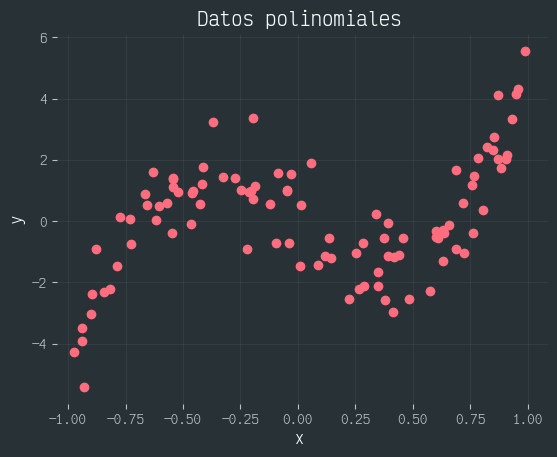

In [4]:
plt.title("Datos polinomiales")
plt.scatter(X, y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

#### Dividimos los datos en entrenamiento y prueba

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

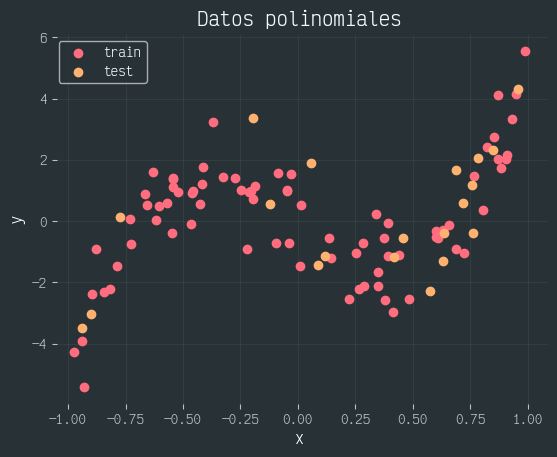

In [6]:
plt.title("Datos polinomiales")
plt.scatter(X_train, y_train, label="train")
plt.scatter(X_test, y_test, label="test")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

Ahora ajustamos un polinomio a los datos generados.

In [7]:
class PolynomialRegressor:
    def __init__(self, degree=0, w_hat=None):
        self.degree = degree
        self.w_hat = w_hat

    def fit(self, x, y):
        """entrenamos el polinomio"""
        self.w_hat = np.polyfit(x, y, self.degree)
        return self

    def predict(self, x):
        """Predecimos"""
        if self.w_hat is not None:
            return np.polyval(self.w_hat, x)
        else:
            raise ValueError("primero necesitas entrenar el modelo.")

    def evaluate(self, x, y):
        """Evaluamos el modelo"""
        if self.w_hat is not None:
            y_hat = np.polyval(self.w_hat, x)
            return root_mean_squared_error(y, y_hat)
        else:
            raise ValueError("primero necesitas entrenar el modelo.")

    def get_params(self, **kwargs):
        return {"w_hat": self.w_hat, "degree": self.degree}

#### De underfitting a overfitting

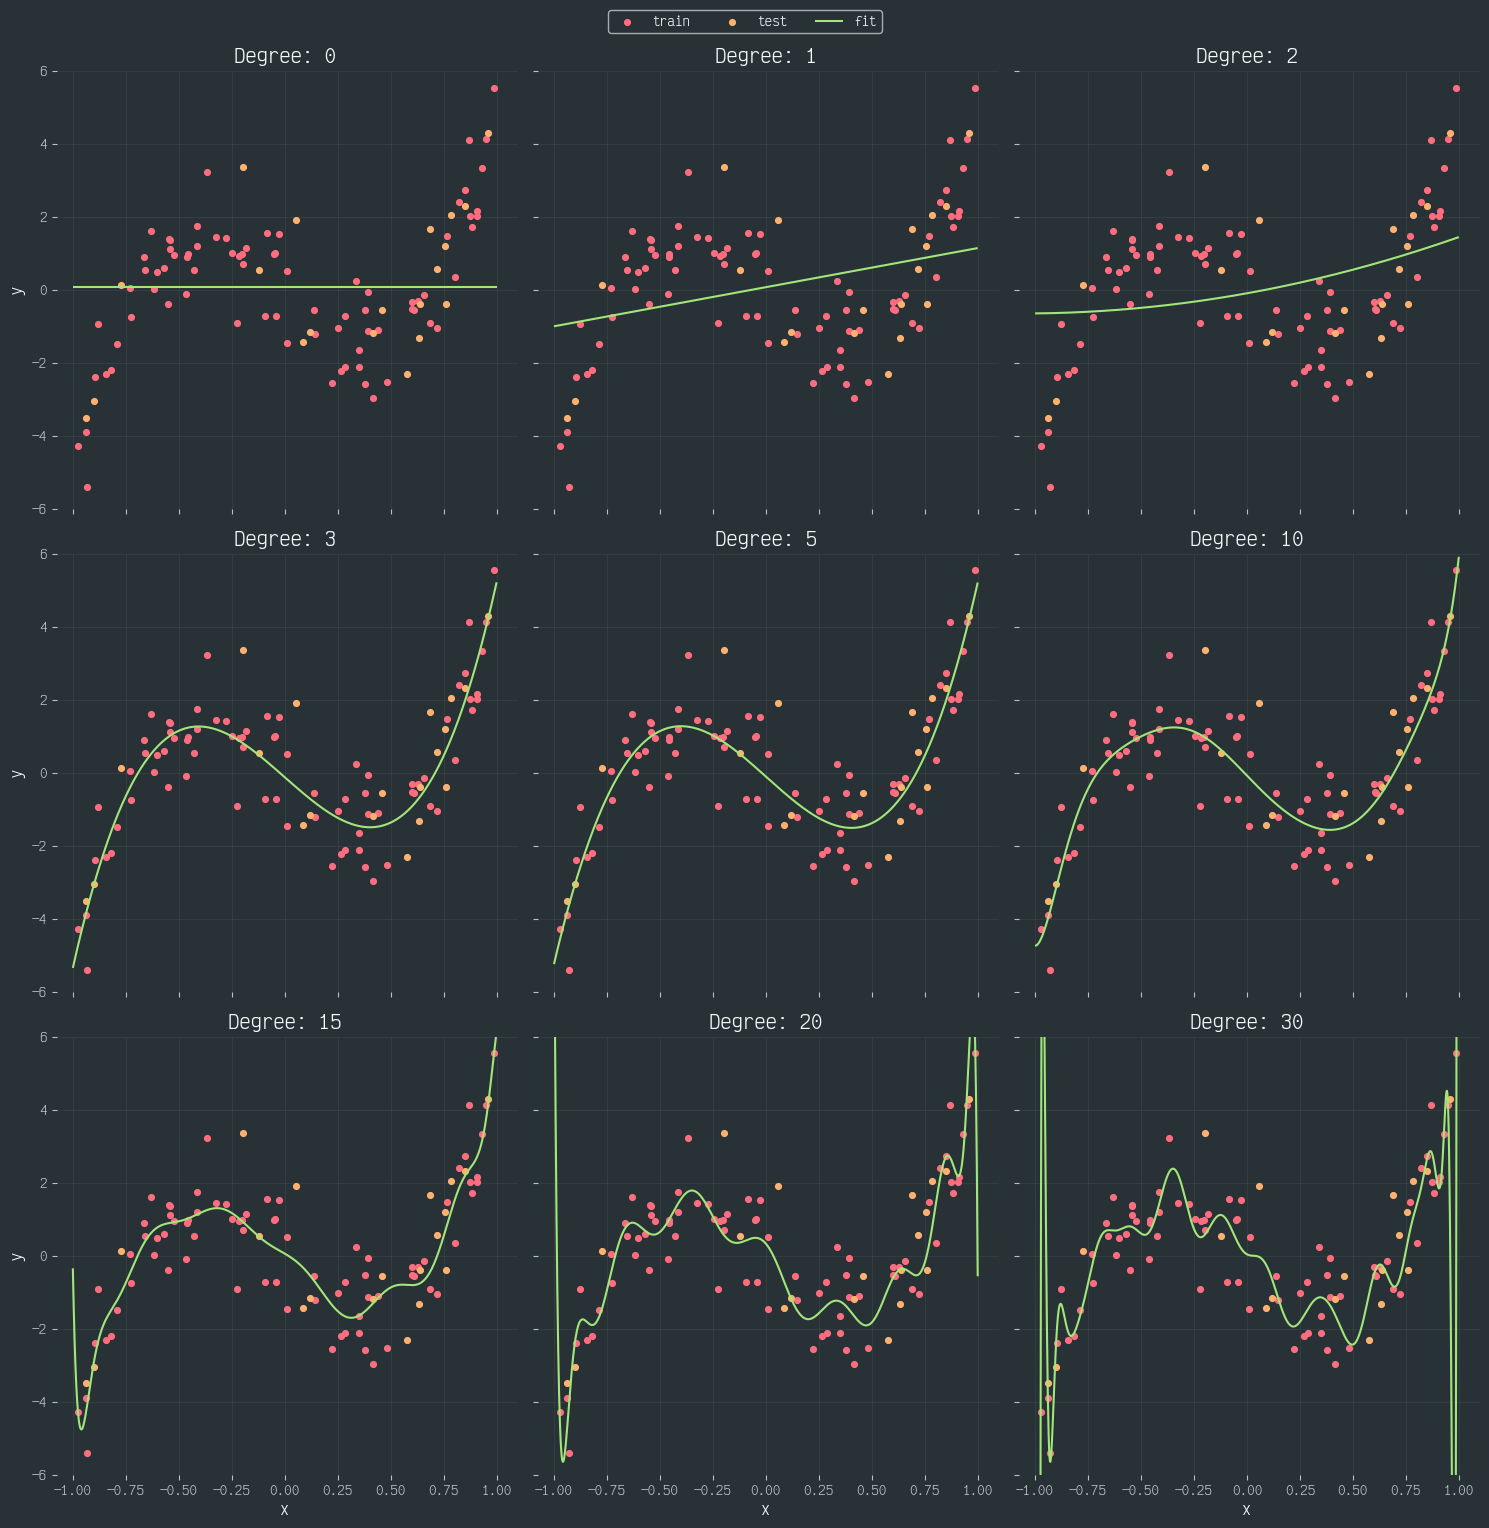

In [8]:
X_lin = np.linspace(-1, 1, 1000)

fig, axes = plt.subplots(3, 3, figsize=(15, 15), sharex=True, sharey=True)

degrees_sample = [0, 1, 2, 3, 5, 10, 15, 20, 30]
for degree, ax in zip(degrees_sample, axes.flatten()):
    pr = PolynomialRegressor(degree=degree)
    pr.fit(X_train, y_train)
    y_fit = pr.predict(X_lin)

    ax.set_title(f"Degree: {degree}")

    ax.scatter(X_train, y_train, label="train", s=17)
    ax.scatter(X_test, y_test, label="test", s=17)
    ax.plot(X_lin, y_fit, c="C3", label="fit")

    ax.set_ylim([-6, 6])

    if ax in axes[-1, :]:
        ax.set_xlabel("x")
    if ax in axes[:, 0]:
        ax.set_ylabel("y")

handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper center", ncol=3, bbox_to_anchor=(0.5, 1.02))

plt.tight_layout()
plt.show()

#### Observamos el error tanto en los datos de entrenamiento como en los datos de prueba

In [9]:
rmse_train = []
rmse_test = []
degrees = list(range(0, 37))

for degree in degrees:
    pr = PolynomialRegressor(degree=int(degree))
    pr.fit(X_train, y_train)
    rmse_train.append(pr.evaluate(X_train, y_train))
    rmse_test.append(pr.evaluate(X_test, y_test))

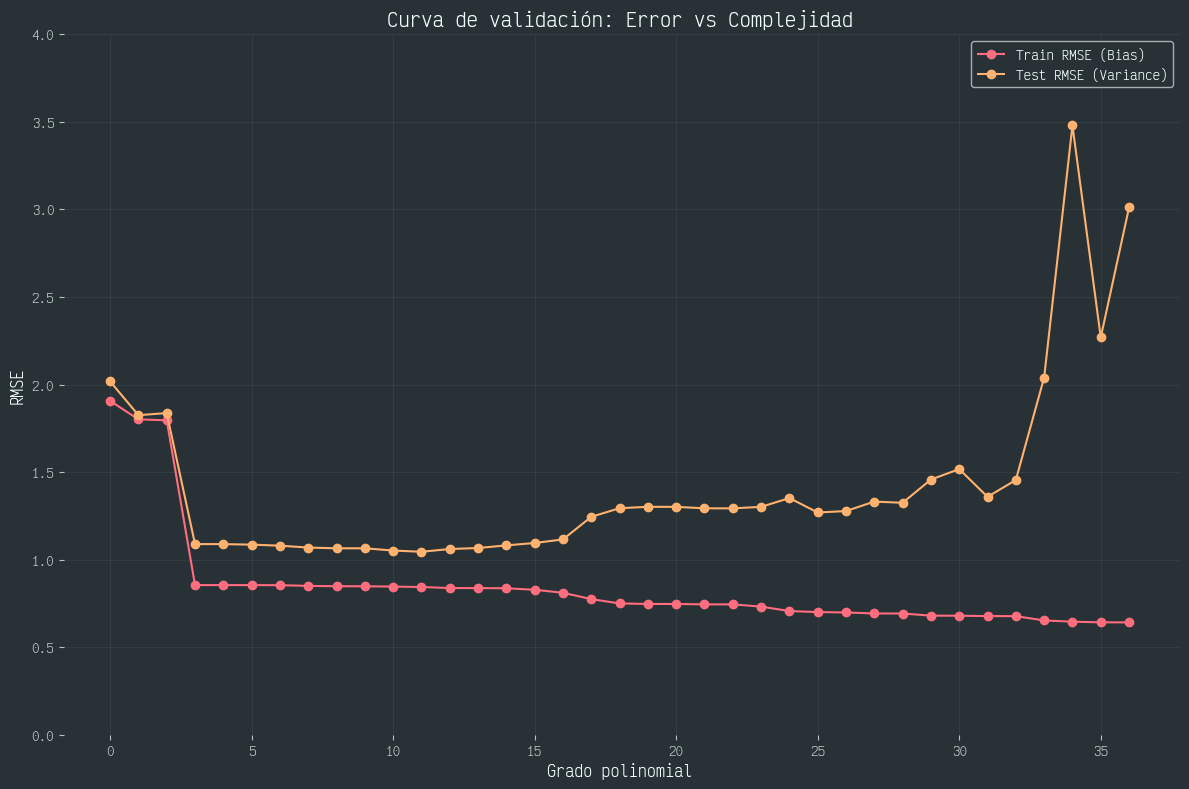

In [10]:
plt.figure(figsize=(12, 8))

plt.plot(degrees, rmse_train, label="Train RMSE (Bias)", marker="o")
plt.plot(degrees, rmse_test, label="Test RMSE (Variance)", marker="o")

plt.title("Curva de validación: Error vs Complejidad")
plt.xlabel("Grado polinomial")
plt.ylabel("RMSE")

plt.ylim(0, 4)

plt.legend()
plt.tight_layout()
plt.show()

Podemos hacer algunas observaciones:

- El error de entrenamiento siempre disminuye al sumar más grados.
- Hay una región entre 3 y 15 donde el error de validación es estable y bajo.
  
Idealmente, elegiríamos los parámetros del modelo de manera que tengamos el mejor rendimiento del modelo. Sin embargo, queremos asegurarnos de que realmente tengamos el mejor rendimiento de validación. Cuando hacemos train_test_split, dividimos aleatoriamente los datos en partes. Lo que podría pasar es que tuvimos suerte y dividimos los datos de manera que favorezca el error de validación.

#### Cross validation

In [11]:
rmse_train = []
rmse_valid = []
degrees = list(range(0, 16))
for degree in degrees:
    pr = PolynomialRegressor(degree=degree)

    results = cross_validate(
        pr,  # type: ignore
        X,
        y,
        cv=5,
        return_train_score=True,
        scoring="neg_root_mean_squared_error",
    )

    rmse_train.append(-np.mean(results["train_score"]))
    rmse_valid.append(-np.mean(results["test_score"]))

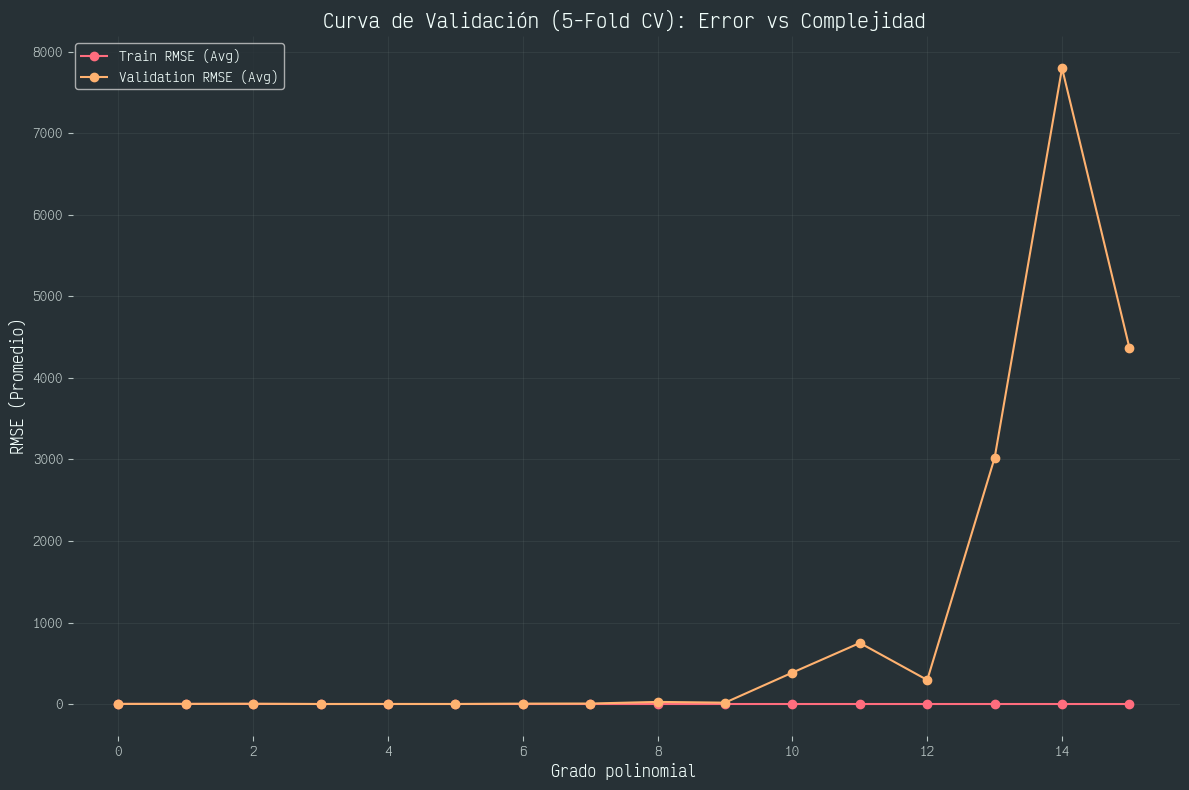

In [12]:
plt.figure(figsize=(12, 8))

plt.plot(degrees, rmse_train, label="Train RMSE (Avg)", marker="o")
plt.plot(degrees, rmse_valid, label="Validation RMSE (Avg)", marker="o")

plt.title("Curva de Validación (5-Fold CV): Error vs Complejidad")
plt.xlabel("Grado polinomial")
plt.ylabel("RMSE (Promedio)")

plt.legend()
plt.tight_layout()
plt.show()

In [13]:
degrees[np.argmin(rmse_valid)]

3

Estas observaciones no son especiales en cuanto a los polinomios: son válidas para el ajuste de modelos de aprendizaje automático en general. 

El desafío al adaptar modelos en el aprendizaje automático es encontrar el ajuste adecuado.

Un modelo demasiado simple no podrá captar la complejidad de los datos y provocará un underfitting.

Un modelo demasiado complejo tiene la capacidad de "memorizar" aspectos de los datos y provocar un sobreajuste.

Si sobreajustamos nuestro modelo no predecirá bien datos nuevos; decimos que no generaliza.

El objetivo es encontrar un modelo que tenga la complejidad adecuada para ajustarse a los datos. El gráfico de tasas de aprendizaje es una herramienta para identificar el punto óptimo de complejidad del modelo.